In [76]:
import os
import numpy as np
import matplotlib.pyplot as plt
# import nibabel as nib
# from nilearn.image import resample_to_img, load_img
import nilearn as nil
from nilearn import plotting
# from nilearn.datasets import fetch_atlas_aal
from mni_to_atlas import AtlasBrowser

In [13]:
n3_dir = os.path.join('data', 'mri', 'ADNI', '136_S_1227', 'MPR____N3__Scaled')
# The files are under a subdirectory within the n3_dir so we need to find each subdirectory
subdirs = [os.path.join(n3_dir, d) for d in os.listdir(n3_dir) if os.path.isdir(os.path.join(n3_dir, d))]

# Get the subsubdirectories that contain the NIfTI files
subsubdirs = []
for subdir in subdirs:
    subsubdirs.extend([os.path.join(subdir, d) for d in os.listdir(subdir) if os.path.isdir(os.path.join(subdir, d))])

# Find all NIfTI files in the subsubdirectories
files = []
for subsubdir in subsubdirs:
    files.extend([os.path.join(subsubdir, f) for f in os.listdir(subsubdir) if f.endswith('.nii')])

print(f'Found NIfTI files: {files}')

Found NIfTI files: ['data\\mri\\ADNI\\136_S_1227\\MPR____N3__Scaled\\2007-02-21_13_12_42.0\\I66824\\ADNI_136_S_1227_MR_MPR____N3__Scaled_Br_20070810000731580_S26837_I66824.nii', 'data\\mri\\ADNI\\136_S_1227\\MPR____N3__Scaled\\2009-03-23_11_59_29.0\\I143856\\ADNI_136_S_1227_MR_MPR____N3__Scaled_Br_20090514132202278_S64957_I143856.nii']


In [80]:
mni = os.path.join('mni', 'icbm152.nii')
mni = nil.image.load_img(mni)
print(f'Shape of MNI image: {mni.shape}')

Shape of MNI image: (121, 145, 121, 2)


In [54]:
atlas = AtlasBrowser('AAL3')

Processing file: data\mri\ADNI\136_S_1227\MPR____N3__Scaled\2007-02-21_13_12_42.0\I66824\ADNI_136_S_1227_MR_MPR____N3__Scaled_Br_20070810000731580_S26837_I66824.nii
Data shape: (256, 256, 170)
sform: 0
Image affine: [[ 3.58643356e-02  2.79860660e-02 -1.20284238e+00  8.56528778e+01]
 [ 1.00321383e-03 -1.00625741e+00 -3.34532487e-02  1.36518585e+02]
 [-1.00642204e+00 -5.75274857e-06 -4.28972159e-02  1.59541260e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


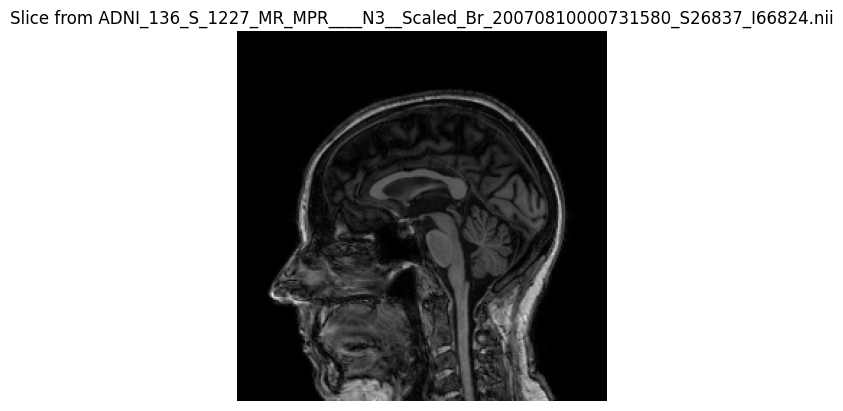

Processing file: data\mri\ADNI\136_S_1227\MPR____N3__Scaled\2009-03-23_11_59_29.0\I143856\ADNI_136_S_1227_MR_MPR____N3__Scaled_Br_20090514132202278_S64957_I143856.nii
Data shape: (256, 256, 170)
sform: 0
Image affine: [[ 0.00000000e+00  6.90291861e-11 -1.20415735e+00  1.01399742e+02]
 [ 6.87771357e-11 -1.00728595e+00 -8.25207597e-11  1.32409393e+02]
 [-1.00360799e+00 -6.90291861e-11  0.00000000e+00  1.14722572e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


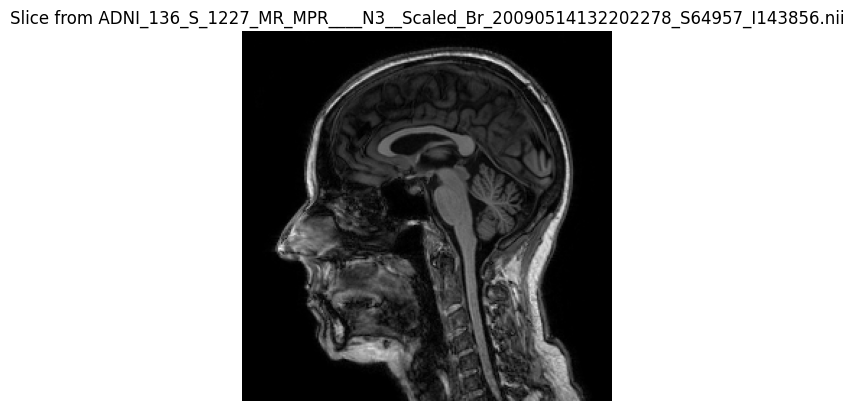

In [71]:

for file in files:
    print(f'Processing file: {file}')
    img = nib.load(file)
    # print(f'Image data type: {type(img)}')
    header = img.header
    # print(f'Header info: {header}')
    data = img.get_fdata()
    print(f'Data shape: {data.shape}')
    print(f"sform: {img.header.get('sform_code')}")
    print(f'Image affine: {img.affine}')

    # Display the middle slice of the 3D volume
    mid_slice = data.shape[2] // 2
    plt.imshow(data[:, :, mid_slice], cmap='gray')
    plt.title(f'Slice from {os.path.basename(file)}')
    plt.axis('off')
    plt.show()



In [79]:
aal = nil.datasets.fetch_atlas_aal(version='3v2')
atlas_img = aal.maps
labels = aal.labels
indices = aal.indices

[fetch_atlas_aal] Dataset found in C:\Users\Dhruv Khanna\nilearn_data\aal_3v2


Image shape: (256, 256, 170)
Image affine: [[ 3.58643356e-02  2.79860660e-02 -1.20284238e+00  8.56528778e+01]
 [ 1.00321383e-03 -1.00625741e+00 -3.34532487e-02  1.36518585e+02]
 [-1.00642204e+00 -5.75274857e-06 -4.28972159e-02  1.59541260e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Resampled image shape: (121, 145, 121)
Resampled image affine: [[  -1.5    0.     0.    90. ]
 [   0.     1.5    0.  -126. ]
 [   0.     0.     1.5  -72. ]
 [   0.     0.     0.     1. ]]


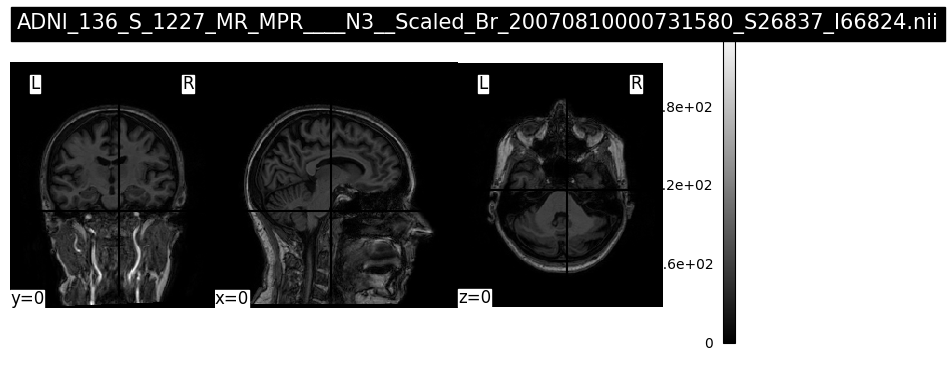

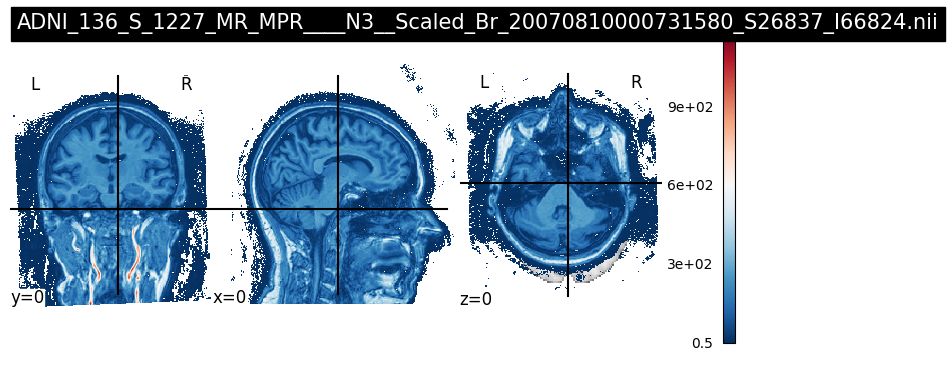

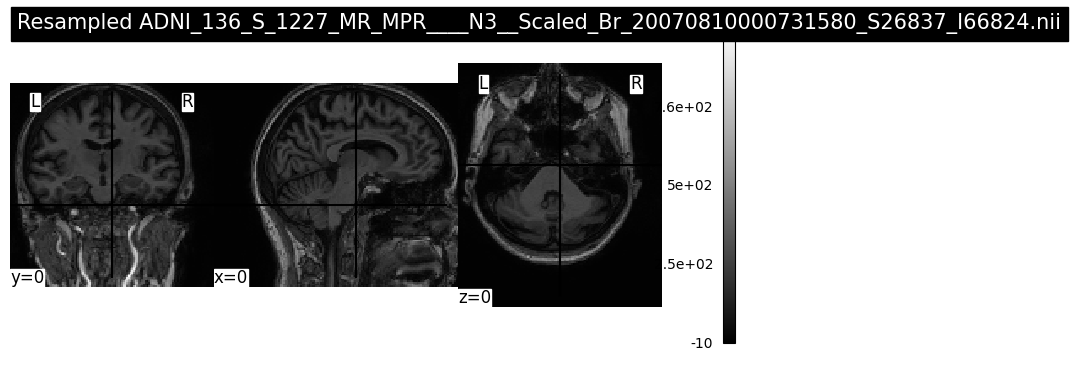

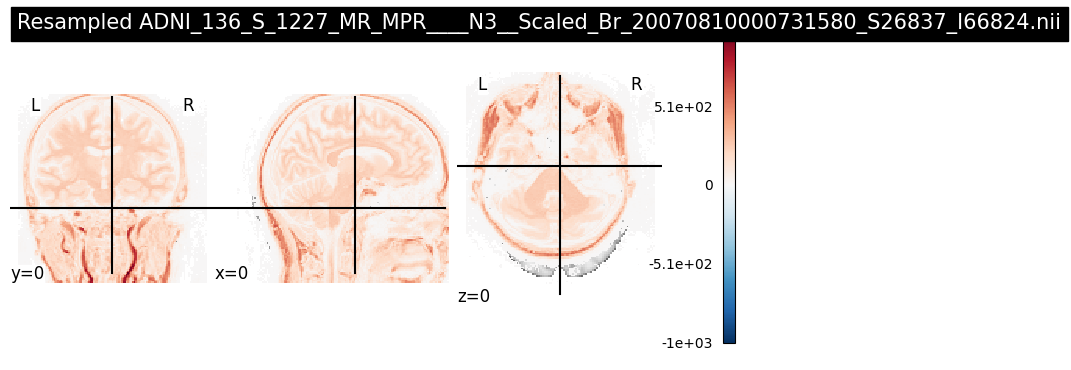

In [81]:
for file in files[:1]:
    img = nil.image.load_img(file)
    print(f'Image shape: {img.shape}')
    print(f'Image affine: {img.affine}')

    plotting.plot_img(img, title=os.path.basename(file), display_mode='ortho', cut_coords=(0, 0, 0))
    plotting.plot_stat_map(img, threshold=0.5, display_mode='ortho', cut_coords=(0, 0, 0), title=os.path.basename(file))

    resampled_img = nil.image.resample_to_img(img, mni, copy_header=True, force_resample=True)
    print(f'Resampled image shape: {resampled_img.shape}')
    print(f'Resampled image affine: {resampled_img.affine}')

    plotting.plot_img(resampled_img, title=f'Resampled {os.path.basename(file)}', display_mode='ortho', cut_coords=(0, 0, 0))
    plotting.plot_stat_map(resampled_img, threshold=0.5, display_mode='ortho', cut_coords=(0, 0, 0), title=f'Resampled {os.path.basename(file)}')